Part I - Prosper Loan Data Analysis
by Elmira Mukailova

Introduction
The Prosper dataset contains 113,937 loans and 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, employment status, and occupation. A discription of each variable is provided in the dictionary which comes with the dataset.
In Part 1 of the project the goal was to see what affects interest rates:Prosper Rating,Income, Credit Score, loan type, loan term, state  of individuals residence.


Preliminary Wrangling

In this section I tried to reduce the size of the database and dropped some of the columns that will not be needed for the analysis.
In addition, columns needed change of format.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_data=pd.read_csv('prosperLoanData.csv')

In [3]:
#overview of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
loan_data.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


#Data Wrangling

1. The dataset contains lots of missing values in columns:

    TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments
    ProsperPaymentsLessThanOneMonthLate
    ProsperPaymentsOneMonthPlusLate
    ProsperPrincipalBorrowed
    ProsperPrincipalOutstanding
    ScorexChangeAtTimeOfListing
    LoanFirstDefaultedCycleNumber
    CreditGrade

As I will not be using this data for my analysis, in the next section I will delete the above listed columns:

In [5]:
#remove columns not needed for analysis
loan_data=loan_data.drop(['TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','ClosedDate','CreditGrade'],axis=1)
loan_data.shape

(113937, 71)

2. Column ListingCreationDate and LoanOriginationDate should be in date format
     

In [6]:
loan_data['LoanOriginationDate']=pd.to_datetime(loan_data['LoanOriginationDate'], yearfirst=True)


In [7]:
loan_data['LoanOriginationDate'].head()

0   2007-09-12
1   2014-03-03
2   2007-01-17
3   2012-11-01
4   2013-09-20
Name: LoanOriginationDate, dtype: datetime64[ns]

In [8]:
loan_data['ListingCreationDate']=pd.to_datetime(loan_data['ListingCreationDate'], yearfirst=True)


In [9]:
loan_data['ListingCreationDate'] = [x.strftime("%y-%m-%d") for x in loan_data.ListingCreationDate]

In [10]:
loan_data['ListingCreationDate']=pd.to_datetime(loan_data['ListingCreationDate'], yearfirst=True)

In [11]:
loan_data['ListingCreationDate'].head()

0   2007-08-26
1   2014-02-27
2   2007-01-05
3   2012-10-22
4   2013-09-14
Name: ListingCreationDate, dtype: datetime64[ns]

### What is the structure of your dataset?

After data wrangling efforts the dataset contains 113937 and 71 columns. Some variables which are strings will need to be converted to categories for further analysis. Information on loan amounts, and interest rates are in numeric values. 

### What is/are the main feature(s) of interest in your dataset?
I am interested how interest rates are affected by various variables such as income level, state, loan type, term of the loan.
A variable 'Prosper Rating" and it relationship to interest rate is especially of interest, as it takes into account several variables such as credit score and income level.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am expecting that income level and employment status will have a big effect on interest rates.
In addtion I would like to see the loan trends during and after during 2008 financial crisis.
In addition, I am interested to see what are major drivers for loan defaults.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [12]:
#2 Number of loans by year (create LoanYear Column)
loan_data['year'] = pd.DatetimeIndex(loan_data['LoanOriginationDate']).year


In [13]:
#borrower's rate range
loan_data['BorrowerRate'].min(), loan_data['BorrowerRate'].max()

(0.0, 0.4975)

Text(0.5,1,'Annual Loan Quantities')

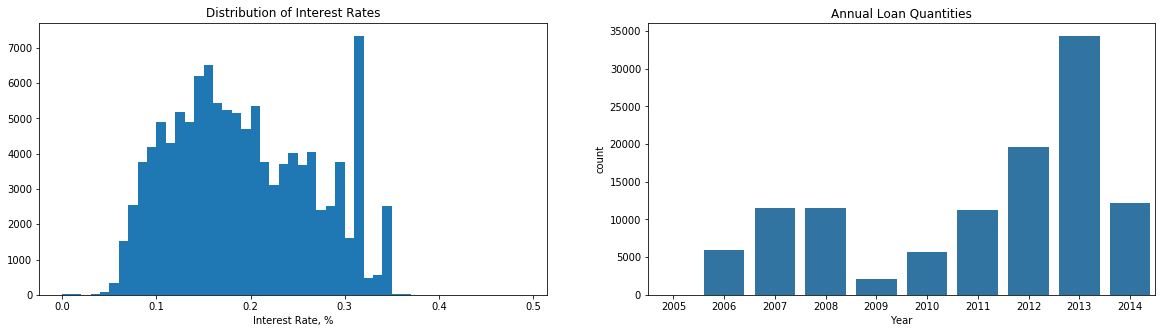

In [14]:
#plot 1 interest rates distribution
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
bins = np.arange(loan_data['BorrowerRate'].min(), loan_data['BorrowerRate'].max(), 0.01)
plt.hist(data=loan_data, x='BorrowerRate',bins=bins);

plt.xlabel('Interest Rate, %')

plt.title('Distribution of Interest Rates')

#plot 2 loan quantities by year
plt.subplot(1,2,2)
base_color = sb.color_palette()[0]
sb.countplot(data=loan_data, x='year', color=base_color);

plt.xlabel('Year')
plt.title('Annual Loan Quantities')

From the histograms above it looks like interest rates require more investigation. The majority of dataset values are between 5% and very high 30%. There is also a spike at 32%. Will be interesting to look at this by year, and what kind of borrowers have high interest rate loans.

According to the second plot, quantity of loans had been increasing gradually after falling in 2009, the hihest quantity in 2013, then dropping in 2014.

In [15]:
state_order=loan_data['BorrowerState'].value_counts()


Teh chart below shows number of loans per prosper rating. 
Further analysis will be performed how prosper rating affects interest rate on a loan. From this chart we can see that most loans are taken by prosper rating C. 

Text(0.5,1,'Loan Distribution by Prosper Rating')

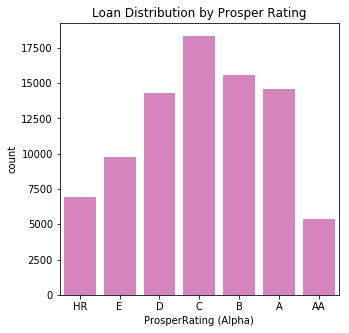

In [218]:
plevels=loan_data['ProsperRating (Alpha)']=loan_data['ProsperRating (Alpha)'].astype("category")
plt.figure(figsize = [5, 5])
base_color=sb.color_palette()[6]
loan_data_prosrat=loan_data[loan_data['ProsperRating (Alpha)'].notnull()]
# check distrubution of prosperity rating
prosp_order=['HR','E','D','C','B','A','AA']
sb.countplot(data=loan_data_prosrat,x='ProsperRating (Alpha)',order=prosp_order,color=base_color);
plt.title("Loan Distribution by Prosper Rating")


The following chart shows number of loans by states. It looks like more loans are taken inthe state of California than anywhere esle. North Dacota is the state that borrowed the smalled quantity of loans. However, these information can be mileading as California is a state with a bigger population. Therefore, if we want to look more into this, we nees to calculated number of loans per 1000 poulation.

Text(0.5,1,'Number of Loans by State')

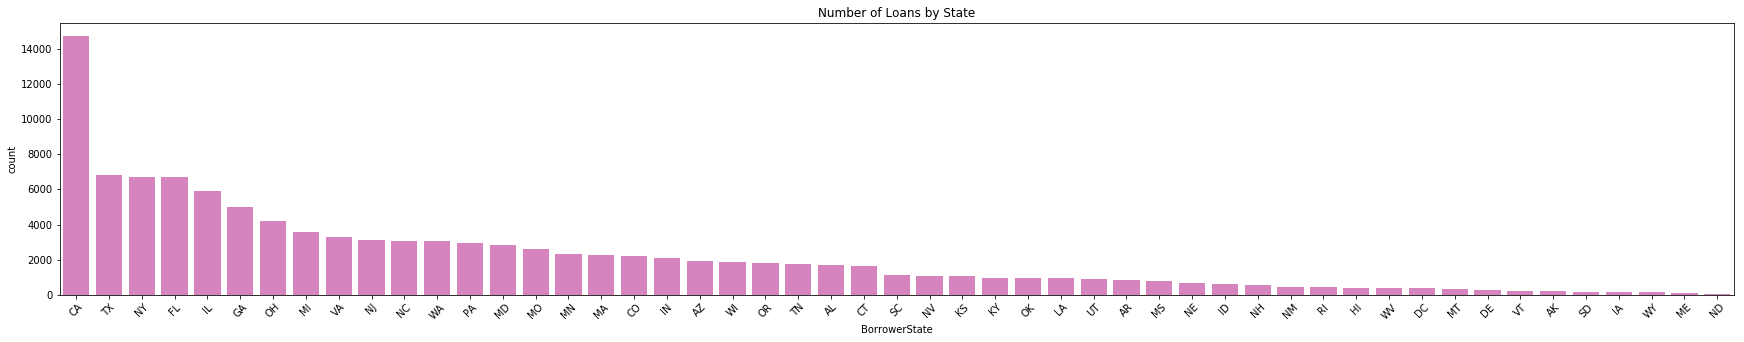

In [22]:
# check number of loans by state
plt.figure(figsize=[30,5])
state_counts=loan_data['BorrowerState'].value_counts()

state_order=state_counts.index;
sb.countplot(data=loan_data,x='BorrowerState',order=state_order,color=base_color);
plt.xticks(rotation=45);
plt.title ("Number of Loans by State");

In the next section I would like to explore a distribution of income of borrowers, and later how income level affects borrower's interest rate.

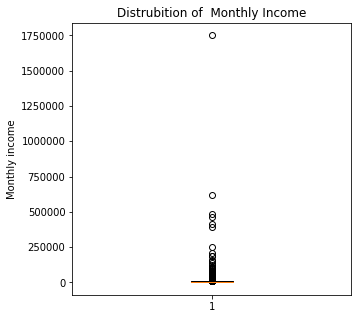

In [25]:
#boxplot for the distrubution of monthly income  
plt.figure(figsize=[5,5])
plt.boxplot(loan_data['StatedMonthlyIncome']);
plt.ylabel('Monthly income');
plt.title('Distrubition of  Monthly Income');


In [75]:
#from the boxplot it is clear that there are many outliers. AS it can be seen from the info below most of monthly income level falls under $7K
#remove outliers with monthly income>20K
loan_data_sub0=loan_data.loc[loan_data['StatedMonthlyIncome']<=250000]
loan_data_sub=loan_data_sub0.loc[loan_data_sub0['StatedMonthlyIncome']>=100]
loan_data_sub['StatedMonthlyIncome'].describe()

count    112172.000000
mean       5659.421045
std        4364.869264
min         100.000000
25%        3333.333333
50%        4733.333333
75%        6833.333333
max      250000.000000
Name: StatedMonthlyIncome, dtype: float64

In [76]:
# log transformation of monthly income function
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return 10 **x 


In [77]:
#apply log transformation to monthly income
loan_data_sub['StatedMonthlyIncome_log10'] =loan_data_sub['StatedMonthlyIncome'].apply(log_trans)
loan_data_sub['StatedMonthlyIncome_log10'].describe()



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    112172.000000
mean          3.671302
std           0.268274
min           2.000000
25%           3.522879
50%           3.675167
75%           3.834633
max           5.397940
Name: StatedMonthlyIncome_log10, dtype: float64

In [78]:
i_min=loan_data_sub['StatedMonthlyIncome_log10'].min()
i_max=loan_data_sub['StatedMonthlyIncome_log10'].max()
i_min,i_max

(2.0, 5.3979400086720375)

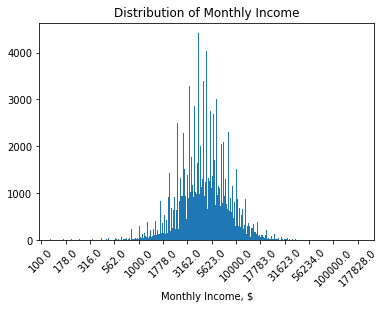

In [79]:
#borrower's monthly income distribution
bi = np.arange(loan_data_sub['StatedMonthlyIncome_log10'].min(),loan_data_sub['StatedMonthlyIncome_log10'].max(),0.01)
plt.hist(data=loan_data_sub, x='StatedMonthlyIncome_log10', bins=bi);

ticks=np.arange(loan_data_sub['StatedMonthlyIncome_log10'].min(),loan_data_sub['StatedMonthlyIncome_log10'].max(),0.25)
labels0=(log_trans(ticks,inverse=True)).round(decimals=0)
labels=['{}'.format(v) for v in labels0]
plt.xticks(ticks,labels,rotation=45)
plt.xlim([(i_min-0.02),(i_max+0.02)])
plt.xlabel('Monthly Income, $')
plt.title('Distribution of Monthly Income');

Distribution of monthly income analysis is a chalenging exercise. There are many values equal to zero and some extreme outliers. For monthly income analysis more exploration is needed, as it may vary by state. This will be explored further in bivariate analysis.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
During Univariate analysis I discovered that variable of interest, borrower's interest rate can be can be as low as 0% as high as 49%. 
I was expecting that majority of the loans will  be taken between 2007 and 2008. Although, the quanties of the loans rose  after 2006, dropped after 2008, the biggest number of loans taken were in 2013. 
Another interesting fact is that most people who took loans are at Prosper rating level C level. 
In the next section I would like to explore a relatioship bw Prosper Rating and Interst rates charged. If rating affects interest rates, than the question is what affects rating. 
At this point my assumption is that Prosper rating is based on credit score, and monthly income.
Distribution of loans by states shows that California has the highest count of loans. TO asnwer which state is the "most borrowing state", we need a size of population for each state. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Monthly income distribution is unusual, many entires of 0 monthly income, and some are very high, but majority of monthly income (75%) is below $7K.As there was a long tail on the right, I had to perform log transformation, and still data needs to be cleaned of outliers. 

If I decide to do further analysis based on this column, I would remove outliers, and monthly income analysis is performed for income rage $100-$50,000. We will explore in the next sections how monthly income is related to Prosper rating and interst rates.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In this section I will explore which variable have an affect on interst rates.

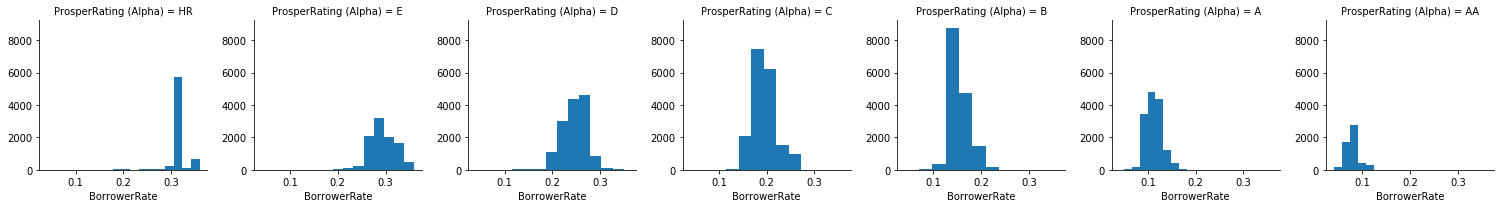

In [34]:
#Relationship bw interest rates and prosper rating
g = sb.FacetGrid(data = loan_data_prosrat, col = 'ProsperRating (Alpha)', col_order=prosp_order)
g.map(plt.hist, 'BorrowerRate')

From the chart above we can see that as Prosper rating get higher (AA being the highest), borrower's interest range moves to the left. The lowest rating pays the higest interest.

The chart below shows that interest rate differe by borrower's place of residence.
The higest average interst rate paind by the state of Alabama, and the lowest inters rate is in Iowa.

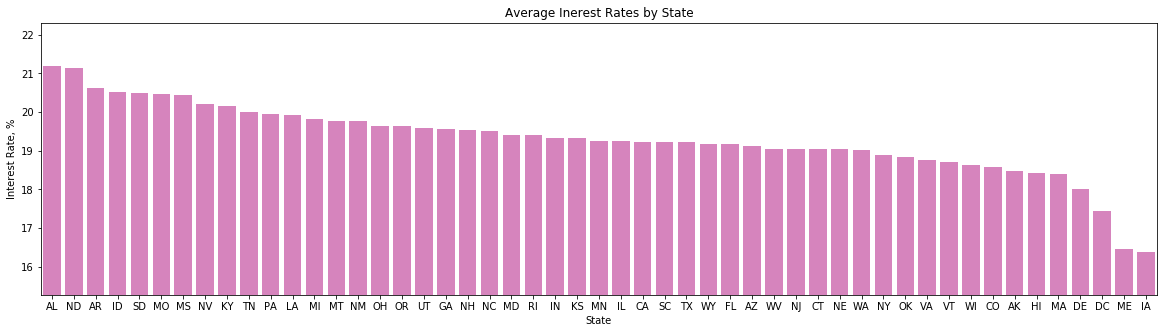

In [48]:
#average interest rates by state
plt.figure(figsize=[20,5])

aver_intrate=loan_data.groupby(['BorrowerState'])['BorrowerRate'].mean().sort_values(ascending=[False])
vert=(aver_intrate.values*100).round(2)
hor=aver_intrate.index.astype('category')
ax=sb.barplot(hor,vert, order=hor,color=base_color)
ax.set_ylim([vert.min()-1.1,vert.max()+1.1]);
plt.xlabel('State')
plt.ylabel('Interest Rate, %')
plt.title('Average Inerest Rates by State');

The charts below show how interest rates changed over time. The highest interst rate range being in 2006, and gradually decreasing by 2014. 
The heat chart shows the most borrowing occuring in 2014 between 10% and 20%

Text(0.5,1,'Interest Rates Trend')

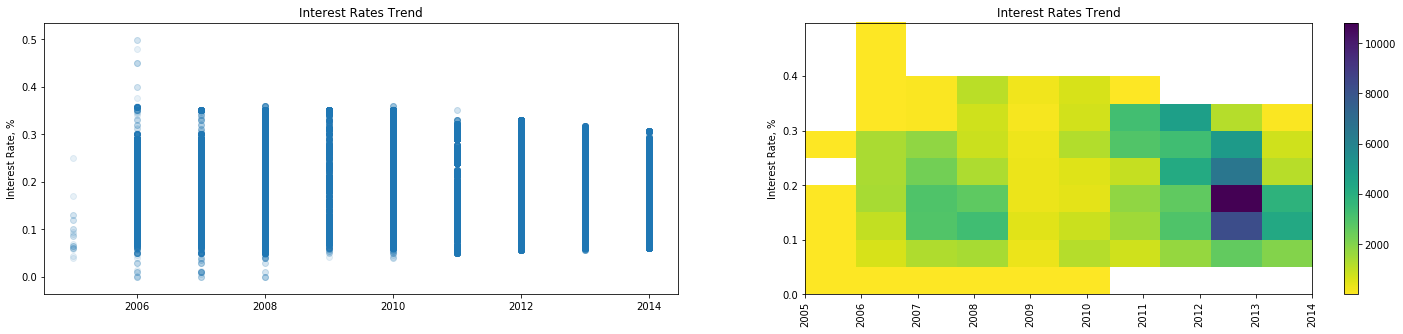

In [157]:
plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
plt.scatter(data = loan_data, x = 'year', y = 'BorrowerRate',alpha = 1/10);
plt.ylabel('Interest Rate, %')
plt.title('Interest Rates Trend')

plt.subplot(1,2,2)
plt.hist2d(data = loan_data, x = 'year', y = 'BorrowerRate',cmin=0.05,cmap='viridis_r')
plt.colorbar()
ti=np.arange(loan_data['year'].min(),loan_data['year'].max()+1,1)
plt.xticks(ti, rotation=90);
plt.ylabel('Interest Rate, %');

plt.title('Interest Rates Trend')

The code below breaks interest rates by loan category to explore which loans pay the highest interst rates.

In [59]:
#explore borrowing by loan type
loan_type_sub=loan_data[loan_data['ListingCategory (numeric)']!=0]


In [62]:
LoanCat={1:'Debt Consolidation', 2:'Home Improvement', 3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
                   7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedures',11:'Engagement Ring', 12:'Green Loans',13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motocycle',
                   17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

In [63]:
loan_type_sub['ListingCategory (alpha)']=loan_type_sub['ListingCategory (numeric)'].map(LoanCat);


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
loan_type_sub['ListingCategory (alpha)'].unique()

array(['Home Improvement', 'Motocycle', 'Debt Consolidation', 'Other',
       'Household Expenses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Business', 'Taxes', 'Baby&Adoption', 'Personal Loan',
       'Engagement Ring', 'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedures', 'Green Loans'], dtype=object)

In [65]:
load_int_mean=loan_type_sub.groupby('ListingCategory (alpha)')['BorrowerRate'].mean().sort_values()

In [66]:
load_int_mean.values

array([ 0.17398118,  0.18060735,  0.18574573,  0.18826132,  0.19091975,
        0.19605346,  0.19758289,  0.19817729,  0.20024576,  0.20059737,
        0.2052496 ,  0.20652249,  0.20655006,  0.20680463,  0.207325  ,
        0.20750521,  0.20908482,  0.21341434,  0.22375601,  0.22594835])

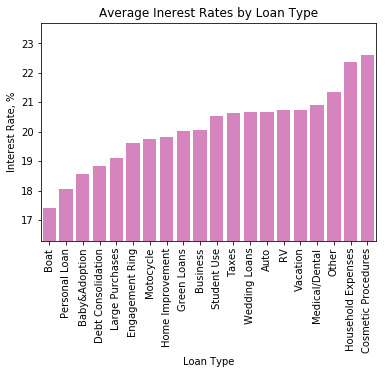

In [67]:
v=(load_int_mean.values*100).round(2)
h=load_int_mean.index.astype('category')
ax=sb.barplot(h,v, order=h,color=base_color)
ax.set_ylim([v.min()-1.1,v.max()+1.1]);
plt.xlabel('Loan Type')
plt.ylabel('Interest Rate, %')
plt.title('Average Inerest Rates by Loan Type');
plt.xticks(rotation=90);

Interest Rates by Loan Type chart shows that the highest interst rates are paid for Cosmetic procedures, Household Expenses, Medical/Dental Expenses and Other.


To explore a relationship between income and Prosper rating a subset of data is created for rows which have Prosper Rating.
THe assumption is that one of the variable that affects Prosper rating is monthly income.
Average of log transformed income level by rating is calculated, and Prosper rating is ploted against average income level on log scale.

In [81]:
loan_data_rate=loan_data_sub[loan_data_sub['ProsperRating (Alpha)'].notnull()]
loan_data_rate.shape

(84066, 73)

In [94]:
aver_intrate_rating=pd.DataFrame(loan_data_rate.groupby('ProsperRating (Alpha)')['StatedMonthlyIncome_log10'].mean()).reset_index() 


,ProsperRating (Alpha),StatedMonthlyIncome_log10
0,A,3.764205
1,AA,3.823784
2,B,3.741271
3,C,3.697901
4,D,3.645114
5,E,3.626372
6,HR,3.583472


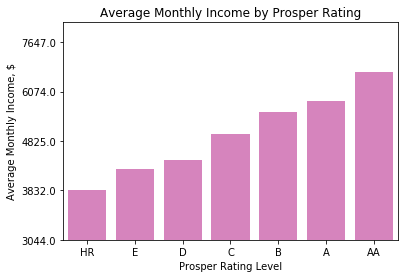

In [156]:
h_p=aver_intrate_rating['ProsperRating (Alpha)']
v_p=aver_intrate_rating['StatedMonthlyIncome_log10']
sb.barplot(h_p,v_p, order=prosp_order,color=base_color)

plt.xlabel('Prosper Rating Level')
plt.ylabel('Average Monthly Income, $')
plt.title('Average Monthly Income by Prosper Rating');
plt.ylim([v_p.min()-.1,v_p.max()+.1]);
ticks_i=np.arange(v_p.min()-.1,v_p.max()+0.1,.1)
labels_in=(log_trans(ticks_i,inverse=True)).round(decimals=0)
labels_inc=['{}'.format(v) for v in labels_in]
plt.yticks(ticks_i,labels_inc);


The chart Average Monthly Income by Prosper Rating shows that the higher is borrowers monthly income the higher is the rating. 

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The bivariate data analysis showed that borrower’s interest rate is largely affected by the state where she/he lives, type of loan, and Prosper rating score. One of the determinants of rating score is income level. The higher income level, the higher is borrower’s score, Prosper rating level determines the rate at which borrower has the loan.

Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One interesting observation is that interest rate depends on a purpose of the loan. The highest interest rate is charged for cosmetic procedures and  household expenses, while the lowest are on borrowing for buying a boat.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In bivariate section we saw taht borrower's interst rate depends on the state of residence, Alabama haivng the highest interest rates. The chart below introduces a third variabel, loan term to explore further this finding.

In [171]:
aver_intrate_m=pd.DataFrame(loan_data.groupby(['Term','BorrowerState'])['BorrowerRate'].mean()).reset_index()

In [172]:
aver_intrate_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
Term             146 non-null int64
BorrowerState    146 non-null object
BorrowerRate     146 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB


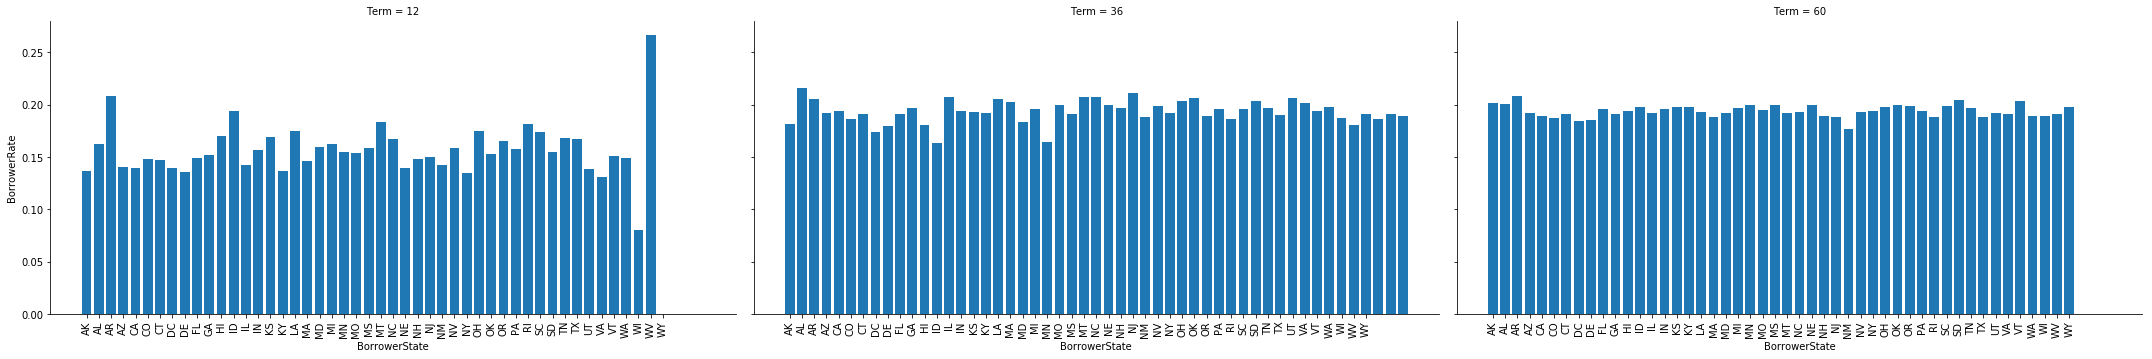

In [173]:
g = sb.FacetGrid(data = aver_intrate_m, col = 'Term',col_wrap=3,margin_titles = True)
g.fig.set_size_inches(30,5)
g.map(plt.bar,'BorrowerState','BorrowerRate')
g.set_xticklabels(rotation=90)

The result is different depending on the term of the loan. Alabama is still paying higher interest rates, but only for 36 month long loan.
For 12 month long loan West Virginia is paying highest rate and 60 month loand Arkansas pays the highest. 

The next set of charts explores relationships bewtween loan term, rating and borrower's interest rate.
So far, it is clear that interest rates depend on a rating an individual receives. 
The question here is how much rates differ by loan term and rating.  

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


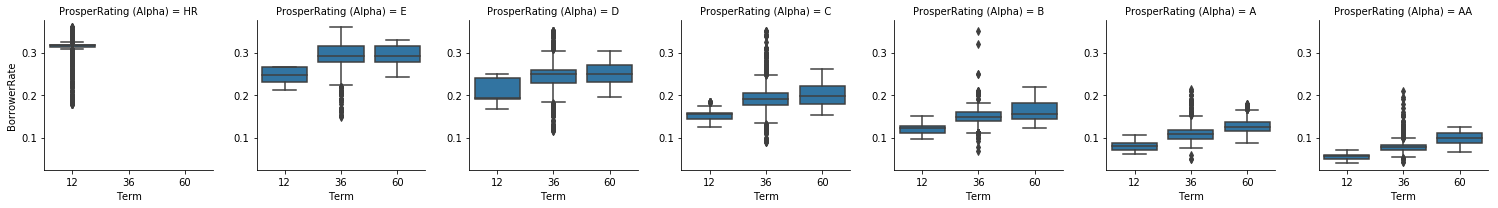

In [211]:
#interest rates by prosper rating and term
g = sb.FacetGrid(data = loan_data_prosrat, col = 'ProsperRating (Alpha)',col_order=prosp_order)
g.map(sb.boxplot,'Term','BorrowerRate')




From the chart above looks like boxplot for HR rating doesn't show 36 and 60 months term. I will ry to explore the relationship separately.

In [226]:
loan_data_HR=loan_data_prosrat[loan_data_prosrat['ProsperRating (Alpha)']=='HR']
loan_data_HR['Term']

15        36
22        36
31        36
71        36
88        36
94        36
100       36
107       36
110       36
112       36
157       36
166       36
186       36
200       36
212       36
265       36
266       36
269       36
280       36
306       36
316       36
328       36
335       36
354       36
363       36
364       36
379       36
416       36
419       36
449       36
          ..
113562    36
113566    36
113567    36
113572    36
113610    36
113612    36
113617    36
113620    36
113625    36
113653    36
113665    36
113669    36
113672    36
113698    36
113710    36
113718    36
113730    36
113742    36
113751    36
113754    36
113770    36
113780    36
113802    36
113808    36
113842    36
113866    36
113873    36
113905    36
113907    36
113920    36
Name: Term, Length: 6935, dtype: int64

In [225]:
loan_data_HR['Term'].unique()

array([36])

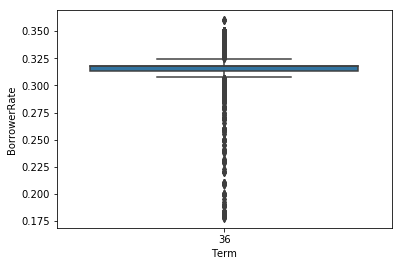

In [224]:
#interest rates by prosper rating and term

sb.boxplot(data=loan_data_HR,x='Term',y='BorrowerRate')


THe following plot zooms into previos finding for interest rates over time. It confirms that interest rates were the lowest in 2005, however, 12 months and 60 months loans became avalable only starting 2010. 
The interest rates for 36 and 60 month loans started falling in 2012 and 2013, except for 12 month loans.
In general, 12 months loans have the lowest interest rate, and 36 months loans the highest.

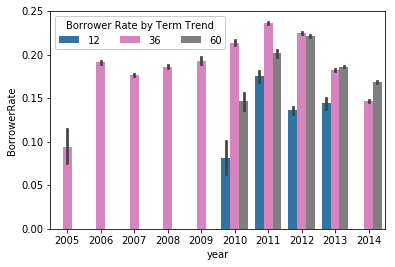

In [59]:
#interest year by term and year
ax = sb.barplot(data = loan_data, x = 'year', y = 'BorrowerRate', hue = 'Term',palette=["C0", "C6", "C7"])
ax.legend(loc = 2, ncol = 3, framealpha =1, title = 'Borrower Rate by Term Trend')


In the next section I would like to see how credit score affects borrowers rate and whether Prosper rating matters to for a better interest rate deal.
Credit score are classified by classes, which are assigned based on lower end of credit score.

300-559 = Poor
580-669 = Fair
670-739 = Good
740-799 = Very Good
780 and more = Excellent

In [234]:
#create a data set with avalable credit scores
loan_data_cs=loan_data_prosrat[loan_data['CreditScoreRangeLower']!=0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [235]:
result = []

for value in loan_data_cs ['CreditScoreRangeLower']:
    if value ==300:
        result.append('Not Available')
    elif value < 580 and value >=300:
        result.append('Poor')
    elif value < 670 and value >=580:
        result.append('Fair')
    elif value < 740 and value >=670:
        result.append('Good')
    elif value < 800 and value >=740:
        result.append('Very good')
    else:
       result.append('Excelent')

In [240]:
loan_data_cs['CreditScore_Class']=result

In [241]:
#seelct only 36 month loan as it is more prevalent 
loan_data_cs36=loan_data_cs[loan_data_cs['Term']==36]
credit_order=['Very Poor','Poor','Fair','Good','Very good','Excelent']
aver_intrate_cred=pd.DataFrame(loan_data_cs36.groupby(['CreditScore_Class','ProsperRating (Alpha)'])['BorrowerRate'].mean()).reset_index()
aver_intrate_cred

,CreditScore_Class,ProsperRating (Alpha),BorrowerRate
0,Excelent,A,0.109295
1,Excelent,AA,0.078736
2,Excelent,B,0.147165
3,Excelent,C,0.204031
4,Excelent,D,0.249575
5,Excelent,E,0.312442
6,Excelent,HR,0.316460
7,Fair,A,0.114742
8,Fair,B,0.150491
9,Fair,C,0.188139


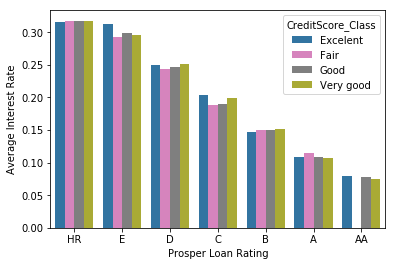

In [242]:
#36 months loan average rate by rating
sb.barplot(data = aver_intrate_cred, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'CreditScore_Class',order=prosp_order,palette=["C0", "C6", "C7", "C8"]);
plt.xlabel('Prosper Loan Rating' );
plt.ylabel('Average Interest Rate');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

